# LabOne-Exploring_Table_Data - Rupal Sanghavi, Omar Roa

This dataset contains information regarding crimes, excluding murders, in the City of Chicago. The attributes contained in the dataset can be grouped into a few categories. These categories are location (Block, Beat, District, Ward, Community Area, Latitude, Longitude, X Coordinate, Y Coordinate, Location, Community Area), Crime Properties (Primary Type, Description, Location Description, Domestic, Arrest), Organizational (IUCR, Case Number, FBI Code, Updated On, Year, Date, ID).

The data itself was provided by the Research & Development Division of the Chicago Police Department but was downloaded via 
https://www.kaggle.com/currie32/crimes-in-chicago This data is important as it could help potentially help in a few areas.

We have an abundance of location and date/time information. This alone can allow us to see patterns in where and when crime happened. Types of crime can also be useful. Awareness of types of crime per ward can help 

1) Help predict crime. Although crime prediction is still inaccurate, there have been new methods created such as PredPol (http://www.predpol.com/). It has not been completely successful (see https://mic.com/articles/156286/crime-prediction-tool-pred-pol-only-amplifies-racially-biased-policing-study-shows#.suYnLauXH ). If we can find meaningful relationships with our data, perhaps we can help predict summer crime in Chicago.

2) Demonstrate areas that may be in need of community involvement (or increase) . With our data, perhaps we can convince city hall to invest more into violence reduction programs (http://www.ncpc.org/topics/violent-crime-and-personal-safety/strategies/strategy-gang-prevention-through-community-intervention-with-high-risk-youth).

The attributes we used  were Date, Primary Type, Beat, Arrest, Date, District, Day_in_month, month, year, and Ward. These were all type String except for Latitude and Ward which are Floats and Arrest which was a bool. The Beat is the smallest police geographic area and the ward is the City Council District where the incident occurred.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', sep=",")

df = df.drop(['Unnamed: 0', 'X Coordinate', 'Y Coordinate'], 1) #unsed columns


In [25]:
#Check which columns have empty or null values
cols = df.columns[np.where(pd.isnull(df))[1]]
cols_nodupl = cols.drop_duplicates()
print(cols_nodupl)

Index(['Location Description', 'Latitude', 'Longitude', 'Location',
       'Community Area', 'Ward', 'District', 'Case Number'],
      dtype='object')


Since all the missing data is from attributes concerning the location of the crime ('Location Description', 'Latitude', 'Longitude', 'Location','Community Area', 'Ward', 'District', and 'Case Number') it seemed as though the address of the crime must have been unknown at time of recording. We chose to not remove the rows with the missing values or impute them because none of these attributes were used in our analyses, except for ward. 

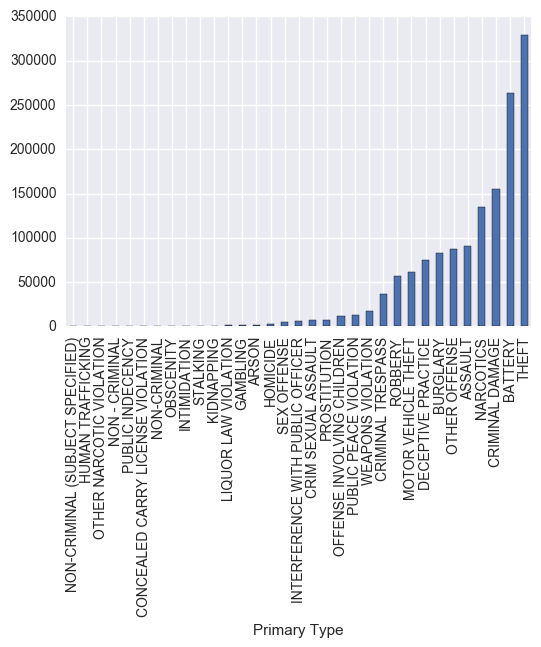

In [27]:
#for __ description, # of arrests
df_grouped = df.groupby(by="Primary Type")
arrests = df_grouped.Arrest.count()
# df["Primary Type"].describe()
# df.info()
arrests.sort_values(inplace=True)
ax = arrests.plot(kind = 'bar')

In this graph, it is evident that the three top crimes committed in Chicago from 2007-2014 that resulted in arrests were of Theft, Battery, and Criminal Damage.

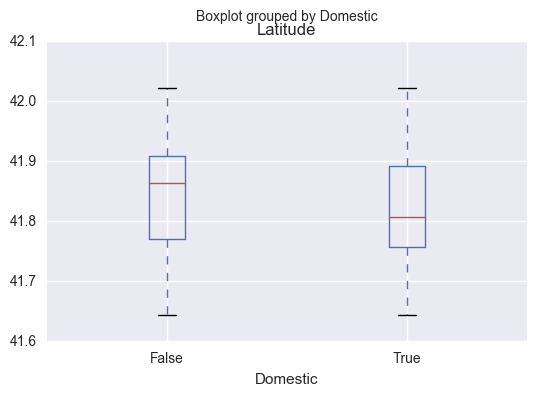

In [28]:
ax = df.boxplot(column='Latitude', by = 'Domestic') # group by class
ax.set_ybound(41.6,42.1)

This boxplot shows that the occurence of domestic crimes was higher in northern parts of Chicago.

In [1]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.set(style="darkgrid") 

f, ax = plt.subplots(figsize=(9, 9))
# df_grouped = df.groupby(by=['Primary Type'])
df_sub = df[['Beat','District', 'Ward','Arrest']]

sns.heatmap(df_sub.corr(), cmap=cmap, annot=True)
f.tight_layout()

NameError: name 'plt' is not defined

This histogram shows that there is a very low correlation between the location of the crime and whether it resulted in an arrest.

In [4]:
#Tokenizing the Date attribute 
tokens = [x.split() for x in df['Date'].values ]
days = [x[0] for x in tokens]
datestokens = [x.split("/") for x in days]
day_in_month = [x[1] for x in datestokens]
month = [x[0] for x in datestokens]
year = [x[2] for x in datestokens]

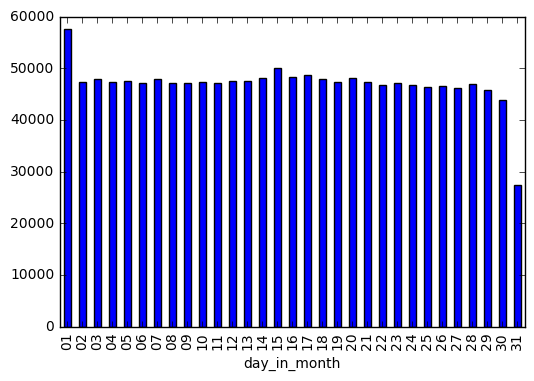

In [5]:
df['day_in_month'] = day_in_month
df['month'] = month
df['year'] = year
grouped = df.groupby(by="day_in_month")
blah = grouped.Arrest.count()
ax = blah.plot(kind = 'bar')

This bar graph shows that the number of arrests resulting from a crime declined towards the end of each month.

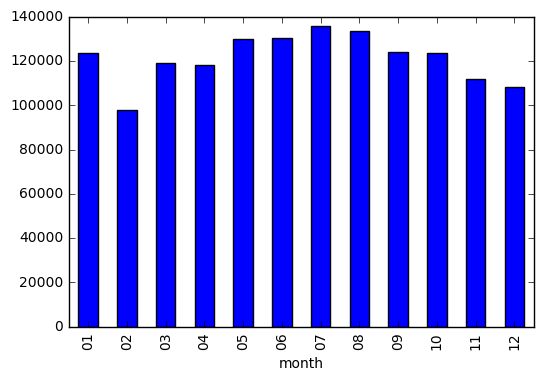

In [6]:
grouped = df.groupby(by="month")
month_arrests = grouped.Arrest.count()
ax = month_arrests.plot(kind = 'bar')


This bar graph shows that the number of arrests resulting from a crime plummeted during colder times of the year such as February. 

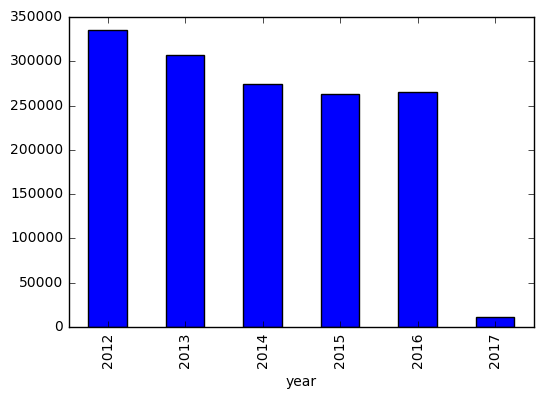

In [7]:
grouped = df.groupby(by="year")
year_arrests = grouped.Arrest.count()
ax = year_arrests.plot(kind = 'bar')

This bar graph demonstrates the decline of arrests resulting from a crime as the years progress.

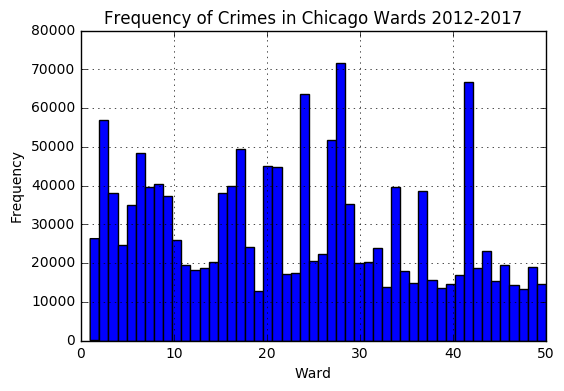

In [8]:
df['Ward'].hist(bins=50, grid=True)
plt.title("Frequency of Crimes in Chicago Wards 2012-2017")
plt.xlabel("Ward")
plt.ylabel("Frequency")

This histogram shows the number of crimes that happened per ward (wards are divisions in the city) throughout 2012 and 2017.  There are 50 wards in Chicago, hence 50 bins for the histogram.

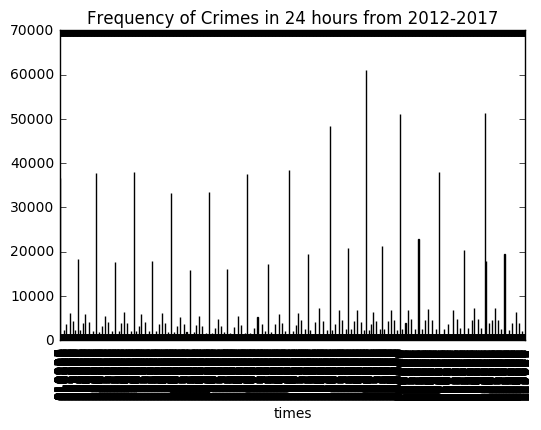

In [9]:
times = [x[1] for x in tokens]
timesWithOutColon =[time.replace(":" , "") for time in times]
df['times'] = timesWithOutColon
grouped_time = df.groupby(by="times")
blah = grouped_time.Arrest.count()
ax = blah.plot(kind = 'bar', title="Frequency of Crimes in 24 hours from 2012-2017")


This bar graph shows frequency of times during a 24 hour period. We removed the colon from the time string, so time values are large (i.e. 24:00:00 = 240000). The tallest bars show that more crimes are happened in the afternoon and late night.